Dependencies

In [37]:
import tensorflow as tf
import os

In [4]:
gpus = tf.config.experimental.list_physical_devices('GPU')
for gpu in gpus:
    tf.config.experimental.set_memory_growth(gpu, True)

Removing dodgy images

In [38]:
import cv2
import imghdr

In [7]:
data_dir = 'data'

In [39]:
image_exts = ['jpeg', 'jpg', 'bmp', 'png']

In [40]:
for image_class in os.listdir(data_dir):
    for image in os.listdir(os.path.join(data_dir, image_class)):
        image_path = os.path.join(data_dir, image_class, image)
        try:
            img = cv2.imread(image_path)
            tip = imghdr.what(image_path)
            if tip not in image_exts:
                print('Image not in ext list {}'.format(image_path))
                os.remove(image_path)
        except Exception as e:
            print('Issue with image {}'.format(image_path))
            # os.remove(image_path)

Load Data

In [20]:
import numpy as np
from matplotlib import pyplot as plt

In [41]:
import os

def check_file_names(directory):
    for root, dirs, files in os.walk(directory):
        for name in files + dirs:
            try:
                name.encode('utf-8')
            except UnicodeEncodeError:
                print(f"Non-UTF-8 file or directory name: {os.path.join(root, name)}")

check_file_names('data')

In [48]:
import cv2
import matplotlib.pyplot as plt

def show_image(image_path):
    img = cv2.imread(image_path)
    if img is not None:
        img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
        plt.imshow(img)
        plt.axis("off")
        plt.title(image_path)
        plt.show()
    else:
        print(f"❌ Unable to read: {image_path}")

data_dir = "data"

for root, _, files in os.walk(data_dir):
    for file in files:
        file_path = os.path.join(root, file)
        img = cv2.imread(file_path)
        if img is None:  # Image is unreadable
            print(f"❌ Corrupted image: {file_path}")
            show_image(file_path)  # Show the image


In [42]:
import tensorflow as tf

def safe_image_dataset_from_directory(directory):
    try:
        return tf.keras.utils.image_dataset_from_directory(directory)
    except UnicodeDecodeError as e:
        print(f"Skipping problematic file: {e}")
        return None

data = safe_image_dataset_from_directory('data')

Skipping problematic file: 'utf-8' codec can't decode byte 0xe1 in position 62: invalid continuation byte


In [44]:
import os

data_dir = "data"  # Change this if your path is different

for root, dirs, files in os.walk(data_dir):
    for file in files:
        try:
            file.encode('utf-8')  # Try encoding to UTF-8
        except UnicodeEncodeError:
            print(f"Problematic file: {os.path.join(root, file)}")


In [45]:
import os

data_dir = "data"  # Change this if your path is different

for root, dirs, files in os.walk(data_dir):
    for file in files:
        try:
            file.encode('utf-8')  # Try encoding to UTF-8
        except UnicodeEncodeError:
            print(f"🚨 Problematic file: {os.path.join(root, file)}")


In [49]:
data = tf.keras.utils.image_dataset_from_directory('data')

Found 706 files belonging to 2 classes.


In [33]:
data_iterator = data.as_numpy_iterator()

In [34]:
batch = data_iterator.next()

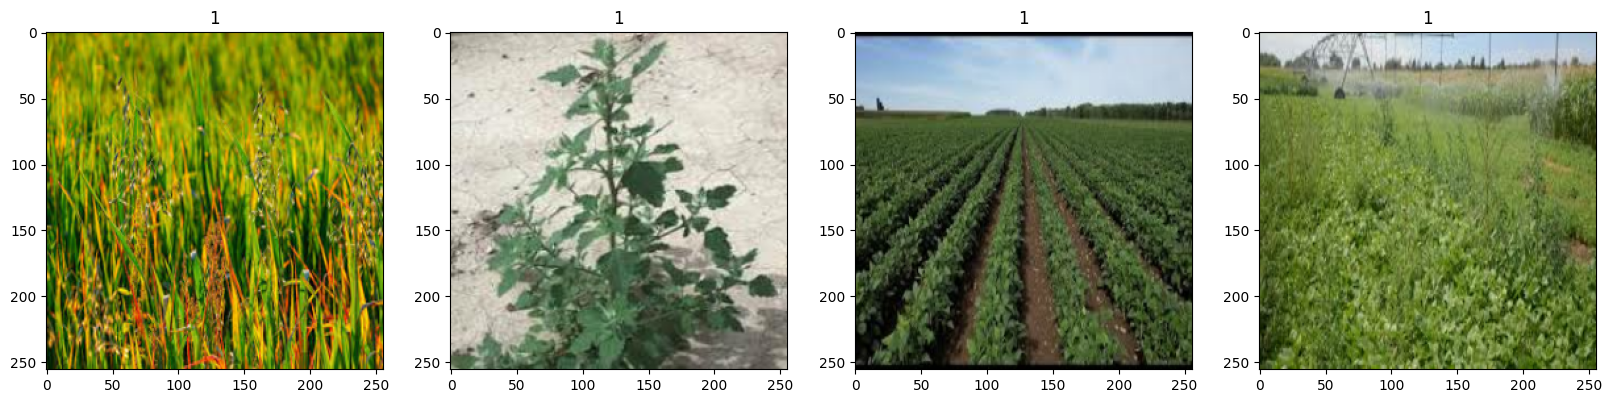

In [35]:
fig, ax = plt.subplots(ncols=4, figsize=(20,20))
for idx, img in enumerate(batch[0][:4]):
    ax[idx].imshow(img.astype(int))
    ax[idx].title.set_text(batch[1][idx])